In [6]:
import pandas as ad
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score
from skimage.filters import threshold_otsu,gaussian
from skimage import exposure,img_as_float
from skimage.segmentation import  flood_fill,clear_border
from skimage.morphology import remove_small_objects, binary_closing
from skimage import measure
import os

thresholding otsu

C:\Users\gamer\AppData\Local\Temp\ipykernel_11992\3808046277.py:14: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))


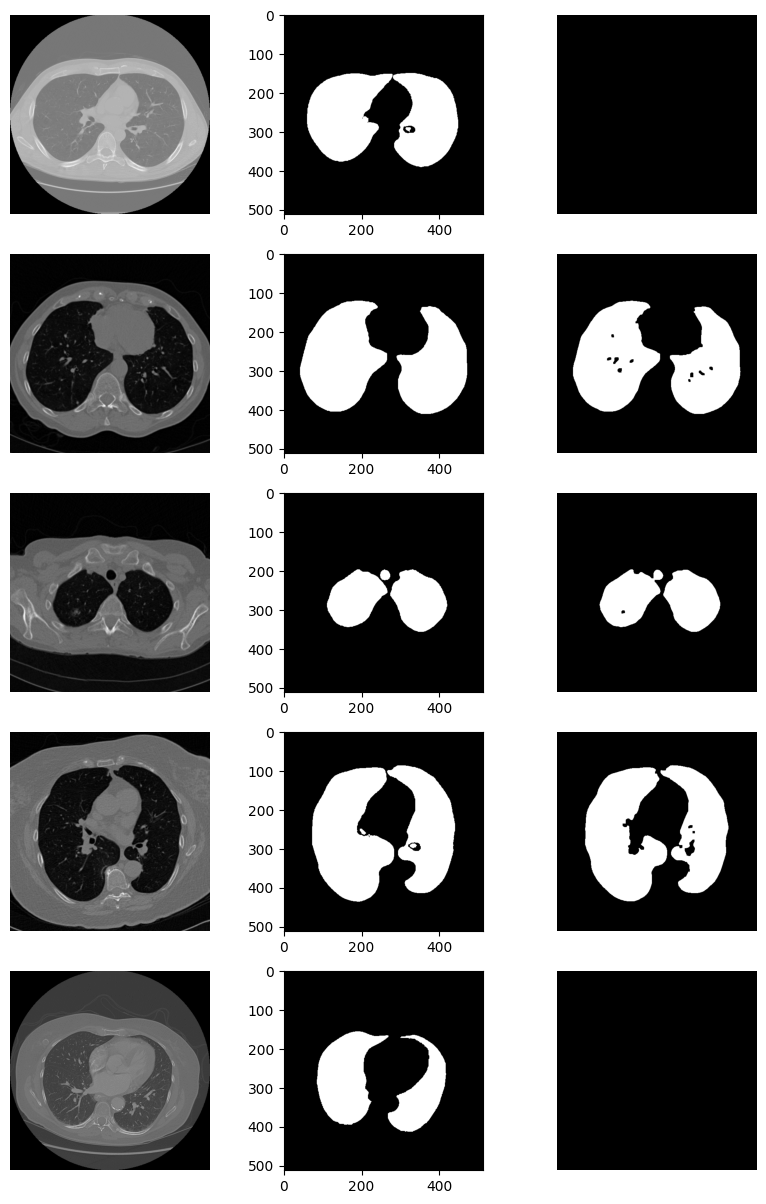

In [20]:
path = "D:/fin_de_etude/data/dataset_2d/"
mask_path="D:/fin_de_etude/data/masks/"
lis = os.listdir(path)
msk_li =os.listdir(mask_path) 
fig, ax = plt.subplots(5, 3, figsize=(10, 15))
for i in range(5):
    img = np.load(os.path.join(path,lis[i]))
    mask = np.load(os.path.join(mask_path,msk_li[i]))
    truth_mask = mask>1
    smooth = gaussian(img, sigma=1.0)
    t = threshold_otsu(smooth)
    mask = smooth<t
    cleaned_mask = remove_small_objects(mask.astype(bool), min_size=500)
    cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
    cleaned_mask = clear_border(cleaned_mask)
    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis("off")
    ax[i,1].imshow(truth_mask,cmap="gray")    
    
    ax[i,2].imshow(cleaned_mask,cmap="gray")
    ax[i,2].axis("off")
plt.show()

region growing
tech de augmentation de region

C:\Users\gamer\AppData\Local\Temp\ipykernel_11992\2848651331.py:19: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))


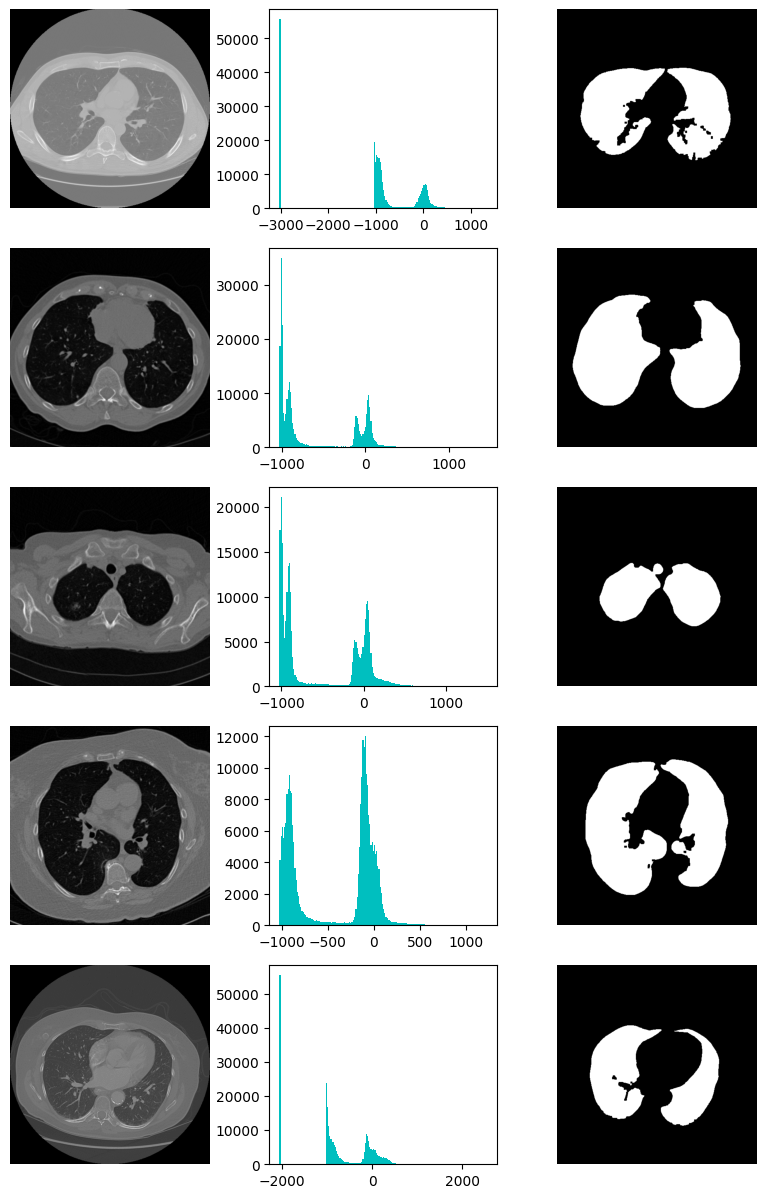

In [4]:
path = "D:/fin_de_etude/data/dataset_2d/"
mask_path = ""
lis = os.listdir(path)
fig, ax = plt.subplots(5, 3, figsize=(10, 15))
for i in range(5):
    img = np.load(os.path.join(path,lis[i]))
   
    smoothed = gaussian(img, sigma=1.0)
    seed_row, seed_col = np.argwhere(img==img.max())[0]
    # Define a mask to limit the region growing
 

    # Perform region growing using flood algorithm
    tolerance = 0.05
    filled =  flood_fill(smoothed, (seed_row, seed_col),0, tolerance=tolerance)


    cleaned_mask = remove_small_objects(filled.astype(bool), min_size=500)
    cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
    cleaned_mask = clear_border(cleaned_mask)

    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis("off")
    ax[i,1].hist(img.flatten(), bins=180, color='c')
    
    
    ax[i,2].imshow(cleaned_mask,cmap="gray")
    ax[i,2].axis("off")
    

C:\Users\gamer\AppData\Local\Temp\ipykernel_11992\571073158.py:18: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))


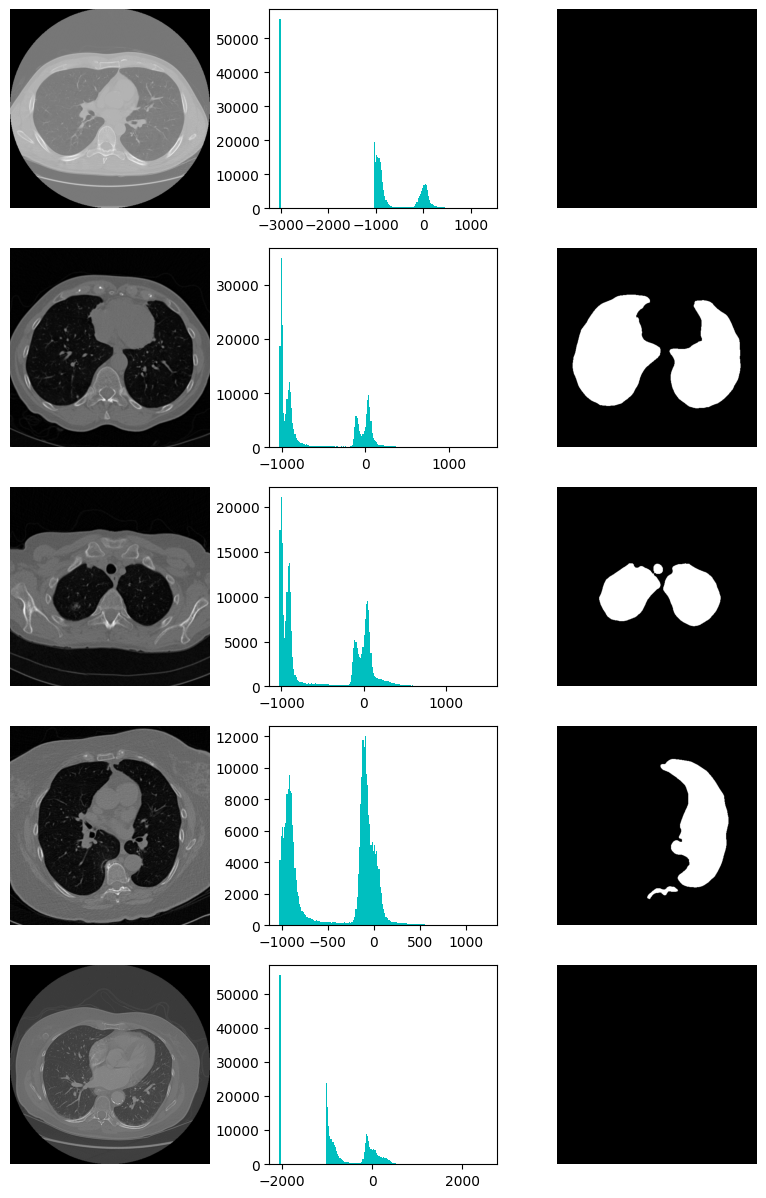

In [5]:
from skimage.feature import canny
from skimage import filters,morphology
from scipy import ndimage as ndi
path = "D:/fin_de_etude/data/dataset_2d/"
lis = os.listdir(path)
fig, ax = plt.subplots(5, 3, figsize=(10, 15))
for i in range(5):
    img = np.load(os.path.join(path,lis[i]))

    edges = canny(img, sigma=3, low_threshold=0.05, high_threshold=0.1)
    

    # Apply morphological operations to close gaps and fill in small holes
    #
    mask = edges.astype(np.uint8)
    mask =   ndi.binary_fill_holes(mask)
    cleaned_mask = remove_small_objects(mask.astype(bool), min_size=500)
    cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
    cleaned_mask = clear_border(cleaned_mask)
    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis("off")
    ax[i,1].hist(img.flatten(), bins=180, color='c')
    
    
    ax[i,2].imshow(cleaned_mask,cmap="gray")
    ax[i,2].axis("off")  

evaluate performence

In [7]:
def threshold(img):
    smooth = gaussian(img, sigma=1.0)
    t = threshold_otsu(smooth)
    mask = smooth<t
    cleaned_mask = remove_small_objects(mask.astype(bool), min_size=500)
    cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
    cleaned_mask = clear_border(cleaned_mask)
    return cleaned_mask
def region_base(img):
    smoothed = gaussian(img, sigma=1.0)
    seed_row, seed_col = np.argwhere(img==img.max())[0]
    # Define a mask to limit the region growing
 

    # Perform region growing using flood algorithm
    tolerance = 0.05
    filled =  flood_fill(smoothed, (seed_row, seed_col),0, tolerance=tolerance)


    cleaned_mask = remove_small_objects(filled.astype(bool), min_size=500)
    cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
    cleaned_mask = clear_border(cleaned_mask)
    return cleaned_mask
def edge_base(img):
    edges = canny(img, sigma=3, low_threshold=0.05, high_threshold=0.1)
    

    # Apply morphological operations to close gaps and fill in small holes
    #
    mask = edges.astype(np.uint8)
    mask =   ndi.binary_fill_holes(mask)
    cleaned_mask = remove_small_objects(mask.astype(bool), min_size=500)
    cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
    cleaned_mask = clear_border(cleaned_mask)
    return cleaned_mask


In [21]:
path = "D:/fin_de_etude/data/dataset_2d/"
mask_path="D:/fin_de_etude/data/masks/"
acc_threshold=[]
acc_region=[]
acc_edge=[]
per_threshold=[]
per_region=[]
per_edge=[]
re_threshold=[]
re_region=[]
re_edge=[]
msk_li =os.listdir(mask_path) 
lis = os.listdir(path)
for file,file2 in zip(lis,msk_li):
    img = np.load(os.path.join(path,file))
    mask = np.load(os.path.join(mask_path,file2))
    mask = mask>1
    acc_threshold.append(accuracy_score(mask.flatten(),threshold(img).flatten()))
    acc_region.append(accuracy_score(mask.flatten(),region_base(img).flatten()))
    acc_edge.append(accuracy_score(mask.flatten(),edge_base(img).flatten()))
    per_threshold.append(precision_score(mask.flatten(),threshold(img).flatten()))
    per_region.append(precision_score(mask.flatten(),region_base(img).flatten()))
    per_edge.append(precision_score(mask.flatten(),edge_base(img).flatten()))
    re_threshold.append(recall_score(mask.flatten(),threshold(img).flatten()))
    re_region.append(recall_score(mask.flatten(),threshold(img).flatten()))
    re_edge.append(recall_score(mask.flatten(),threshold(img).flatten()))


print("threshold_otsu accuracy",np.mean(acc_threshold))
print("region growing accuracy",np.mean(acc_region))
print("edge canny accuracy",np.mean(acc_edge))
print("threshold_otsu persion",np.mean(per_threshold))
print("region growing persion",np.mean(per_region))
print("edge canny persion",np.mean(per_edge))
print("threshold_otsu recall",np.mean(re_threshold))
print("region growing recall",np.mean(re_region))
print("edge canny recall",np.mean(re_edge))




C:\Users\gamer\AppData\Local\Temp\ipykernel_11992\2377324152.py:6: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
C:\Users\gamer\AppData\Local\Temp\ipykernel_11992\2377324152.py:21: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
C:\Users\gamer\AppData\Local\Temp\ipykernel_11992\2377324152.py:33: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
C:\Users\gamer\AppData\Local\Temp\ipykernel_11992\2377324152.py:6: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in ver

threshold_otsu accuracy 0.86039026970286
region growing accuracy 0.9380642801122281
edge canny accuracy 0.8183193677209418
threshold_otsu persion 0.3248241292720516
region growing persion 0.7529157746948874
edge canny persion 0.403360329581994
threshold_otsu recall 0.31116052045165177
region growing recall 0.31116052045165177
edge canny recall 0.31116052045165177


In [22]:
print("threshold_otsu accuracy",np.mean(acc_threshold))
print("region growing accuracy",np.mean(acc_region))
print("edge canny accuracy",np.mean(acc_edge))
print("threshold_otsu persion",np.mean(per_threshold))
print("region growing persion",np.mean(per_region))
print("edge canny persion",np.mean(per_edge))
print("threshold_otsu recall",np.mean(re_threshold))
print("region growing recall",np.mean(re_region))
print("edge canny recall",np.mean(re_edge))

threshold_otsu accuracy 0.86039026970286
region growing accuracy 0.9380642801122281
edge canny accuracy 0.8183193677209418
threshold_otsu persion 0.3248241292720516
region growing persion 0.7529157746948874
edge canny persion 0.403360329581994
threshold_otsu recall 0.31116052045165177
region growing recall 0.31116052045165177
edge canny recall 0.31116052045165177
